<a href="https://colab.research.google.com/github/sollunium/data-anaysis/blob/main/Datathon_Covid_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.pyplot import figure
from pandas.tseries.offsets import DateOffset
import datetime
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [ ]:
df.tail()

,date,state,fips,cases,deaths
38473,2022-01-28,Virginia,51,1525603,16127
38474,2022-01-28,Washington,53,1295560,10756
38475,2022-01-28,West Virginia,54,438889,5743
38476,2022-01-28,Wisconsin,55,1503538,12291
38477,2022-01-28,Wyoming,56,144526,1625


In [ ]:
nys = df[df['state']=='New York']

In [ ]:
nys.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [ ]:
#dropping fips
nys.drop(columns=nys.columns[2:3], inplace = True, axis=1)

In [ ]:
#actual daily total cases
newcase = []
previuos_case = 0
for index, row in nys.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
nys['new_cases'] = newcase

#daily total deaths
newdeath = []
previuos_death = 0
for index, row in nys.iterrows():
  current_death = row['deaths']
  newdeath_count = current_death - previuos_death
  previuos_death = current_death
  newdeath.append(newdeath_count)
nys['new_deaths'] = newdeath

In [ ]:
nys['new_cases'].sum()

4761590

In [ ]:
nys['new_deaths'].sum()

In [ ]:
nys['date'] = pd.to_datetime(nys['date']) - pd.to_timedelta(7, unit='d')
nys_weekly_deaths = nys.groupby(['state', pd.Grouper(key='date', freq='W-MON')])['new_deaths'].sum().reset_index().sort_values('date')
print(nys_weekly_deaths)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


        state       date  new_deaths
0    New York 2020-02-24           0
1    New York 2020-03-02           0
2    New York 2020-03-09          10
3    New York 2020-03-16         173
4    New York 2020-03-23        1329
..        ...        ...         ...
96   New York 2021-12-27         636
97   New York 2022-01-03         922
98   New York 2022-01-10        1360
99   New York 2022-01-17        1438
100  New York 2022-01-24         950

[101 rows x 3 columns]


In [ ]:
weekly_max_index = nys_weekly_deaths['new_deaths'].idxmax()
max_row = nys_weekly_deaths.iloc[[weekly_max_index]]
print(max_row)

      state       date  new_deaths
6  New York 2020-04-06        6849


# NYS Monthly Covid Cases

In [ ]:
nys_monthly_cases = nys.groupby(['state', pd.Grouper(key='date', freq='M')])['new_cases'].sum().reset_index().sort_values('date')
print(nys_monthly_cases)

       state       date  new_cases
0   New York 2020-02-29         89
1   New York 2020-03-31     141614
2   New York 2020-04-30     191228
3   New York 2020-05-31      49948
4   New York 2020-06-30      20049
5   New York 2020-07-31      21421
6   New York 2020-08-31      20402
7   New York 2020-09-30      28243
8   New York 2020-10-31      57360
9   New York 2020-11-30     188637
10  New York 2020-12-31     363151
11  New York 2021-01-31     398339
12  New York 2021-02-28     214427
13  New York 2021-03-31     228506
14  New York 2021-04-30     141758
15  New York 2021-05-31      39450
16  New York 2021-06-30      11011
17  New York 2021-07-31      55245
18  New York 2021-08-31     137504
19  New York 2021-09-30     150764
20  New York 2021-10-31     128460
21  New York 2021-11-30     208437
22  New York 2021-12-31    1170909
23  New York 2022-01-31     794638


# NYS Monthly Covid Deaths


In [ ]:
nys_monthly_deaths = nys.groupby(['state', pd.Grouper(key='date', freq='M')])['new_deaths'].sum().reset_index().sort_values('date')
print(nys_monthly_deaths)

       state       date  new_deaths
0   New York 2020-02-29           0
1   New York 2020-03-31        7185
2   New York 2020-04-30       19021
3   New York 2020-05-31        3977
4   New York 2020-06-30        1751
5   New York 2020-07-31         402
6   New York 2020-08-31         264
7   New York 2020-09-30         250
8   New York 2020-10-31         437
9   New York 2020-11-30        1350
10  New York 2020-12-31        4046
11  New York 2021-01-31        5704
12  New York 2021-02-28        3470
13  New York 2021-03-31        2475
14  New York 2021-04-30        1745
15  New York 2021-05-31         818
16  New York 2021-06-30         239
17  New York 2021-07-31         197
18  New York 2021-08-31         738
19  New York 2021-09-30        1081
20  New York 2021-10-31        1095
21  New York 2021-11-30        1151
22  New York 2021-12-31        2431
23  New York 2022-01-31        4083


In [ ]:
monthly_max_index2 = nys_monthly_deaths['new_deaths'].idxmax()
max_row = nys_monthly_deaths.iloc[[monthly_max_index2]]
print(max_row)

      state       date  new_deaths
2  New York 2020-04-30       19021


In [ ]:
fig = px.bar(nys, x='date', y='new_cases', labels={'new_cases': 'New Cases Reported Daily'}, title = 'Covid Cases over Time')
fig.show()

In [ ]:
fig = px.line(nys, x='date', y='new_deaths', labels={'new_deaths': 'New Deaths Reported Daily'}, title = 'Covid Deaths over Time')
fig.show()

In [ ]:
new_cases_30 = nys['new_cases'][-31:-1]
new_date_30 = nys['date'][-31:-1]

In [ ]:
fig = px.bar(nys, y=new_cases_30, x=new_date_30)

fig.update_layout(
    title="Covid Cases in the last 30 Days",
    xaxis_title="Date",
    yaxis_title="New Cases")
    
fig.show()

**Deadliest Month**: April 2020 with 19021 deaths  
**Deadliest Week**: The week of April 6th with 6849 deaths

Based on the data above, we can see that NYS had a huge spike in cases towards the end of December. This coincides with the new variant omnicron that was discovered to be a super spreader. In the last 30 days covid cases have started to decrease which may show that New York State has reached the peak for the omnicron variant. The data also shows a sharp decrease in daily deaths from the beginning of the pandemic. This may be attributed to lockdown measures and the vaccine.

# Covid Test Trends 

In [ ]:
from matplotlib import style
import seaborn as sns
sns.set()

In [ ]:
tests_df = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/trends/tests.csv')

In [ ]:
tests_df.head(10)

,DATE,TOTAL_TESTS,POSITIVE_TESTS,PERCENT_POSITIVE,TOTAL_TESTS_7DAYS_AVG,POSITIVE_TESTS_7DAYS_AVG,PERCENT_POSITIVE_7DAYS_AVG,TOTAL_ANTIGEN_TESTS,TOTAL_ANTIGEN_TESTS_7DAYS_AVG,INCOMPLETE
0,03/03/2020,15,1,0.0667,0,0,0.0000,0,0,0
1,03/04/2020,40,5,0.1250,0,0,0.0000,0,0,0
2,03/05/2020,66,4,0.0606,0,0,0.0000,0,0,0
3,03/06/2020,89,8,0.0899,0,0,0.0000,0,0,0
4,03/07/2020,77,8,0.1039,0,0,0.0000,1,0,0
5,03/08/2020,113,21,0.1858,0,0,0.0000,0,0,0
6,03/09/2020,409,60,0.1467,113,15,0.1290,44,0,0
7,03/10/2020,482,73,0.1515,178,24,0.1370,0,0,0
8,03/11/2020,817,164,0.2007,288,46,0.1603,0,0,0
9,03/12/2020,1621,369,0.2276,506,97,0.1910,0,0,0


In [ ]:
tests_df.shape

(695, 10)

In [ ]:
tests_df.count

<bound method DataFrame.count of            DATE  TOTAL_TESTS  ...  TOTAL_ANTIGEN_TESTS_7DAYS_AVG  INCOMPLETE
0    03/03/2020           15  ...                              0           0
1    03/04/2020           40  ...                              0           0
2    03/05/2020           66  ...                              0           0
3    03/06/2020           89  ...                              0           0
4    03/07/2020           77  ...                              0           0
..          ...          ...  ...                            ...         ...
690  01/22/2022        39108  ...                          19736      203000
691  01/23/2022        36143  ...                          19078      203000
692  01/24/2022        94460  ...                          17638      203000
693  01/25/2022        89281  ...                          16232      203000
694  01/26/2022        75220  ...                          14453      203000

[695 rows x 10 columns]>

In [ ]:
tests_df.columns

Index(['DATE', 'TOTAL_TESTS', 'POSITIVE_TESTS', 'PERCENT_POSITIVE',
       'TOTAL_TESTS_7DAYS_AVG', 'POSITIVE_TESTS_7DAYS_AVG',
       'PERCENT_POSITIVE_7DAYS_AVG', 'TOTAL_ANTIGEN_TESTS',
       'TOTAL_ANTIGEN_TESTS_7DAYS_AVG', 'INCOMPLETE'],
      dtype='object')

In [ ]:
tests_df.isnull().sum()

DATE                             0
TOTAL_TESTS                      0
POSITIVE_TESTS                   0
PERCENT_POSITIVE                 0
TOTAL_TESTS_7DAYS_AVG            0
POSITIVE_TESTS_7DAYS_AVG         0
PERCENT_POSITIVE_7DAYS_AVG       0
TOTAL_ANTIGEN_TESTS              0
TOTAL_ANTIGEN_TESTS_7DAYS_AVG    0
INCOMPLETE                       0
dtype: int64

In [ ]:
tests_df.tail()

,DATE,TOTAL_TESTS,POSITIVE_TESTS,PERCENT_POSITIVE,TOTAL_TESTS_7DAYS_AVG,POSITIVE_TESTS_7DAYS_AVG,PERCENT_POSITIVE_7DAYS_AVG,TOTAL_ANTIGEN_TESTS,TOTAL_ANTIGEN_TESTS_7DAYS_AVG,INCOMPLETE
690,01/22/2022,39108,5078,0.1298,79885,9949,0.1245,14174,19736,203000
691,01/23/2022,36143,4731,0.1309,78251,9266,0.1184,12387,19078,203000
692,01/24/2022,94460,7750,0.0820,78749,8458,0.1074,19244,17638,203000
693,01/25/2022,89281,6311,0.0707,74969,7300,0.0974,15685,16232,203000
694,01/26/2022,75220,5018,0.0667,69676,6312,0.0906,10110,14453,203000


In [ ]:
tests_df['TOTAL_TESTS'].max() #total number of tests

198159

In [ ]:
tests_df.describe()

,TOTAL_TESTS,POSITIVE_TESTS,PERCENT_POSITIVE,TOTAL_TESTS_7DAYS_AVG,POSITIVE_TESTS_7DAYS_AVG,PERCENT_POSITIVE_7DAYS_AVG,TOTAL_ANTIGEN_TESTS,TOTAL_ANTIGEN_TESTS_7DAYS_AVG,INCOMPLETE
count,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000
mean,49059.648921,3397.568345,0.080139,44769.166906,3204.735252,0.079351,11850.709353,11033.972662,2044.604317
std,33052.286166,7307.439506,0.126816,23861.349759,6389.879194,0.127436,10634.064248,9270.951295,20284.632294
min,15.000000,1.000000,0.004200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25005.000000,553.000000,0.016550,27035.500000,511.500000,0.016300,210.500000,217.500000,0.000000
50%,40972.000000,1423.000000,0.032200,46411.000000,1425.000000,0.031500,11797.000000,13130.000000,0.000000
75%,72530.500000,3639.000000,0.076100,57554.000000,3590.000000,0.072350,19250.000000,16789.000000,0.000000
max,198159.000000,66410.000000,0.711700,133002.000000,43842.000000,0.681300,55885.000000,40935.000000,203000.000000


In [ ]:
molecular_tests = tests_df[['DATE','TOTAL_TESTS','POSITIVE_TESTS']]
molecular_tests

,DATE,TOTAL_TESTS,POSITIVE_TESTS
0,03/03/2020,15,1
1,03/04/2020,40,5
2,03/05/2020,66,4
3,03/06/2020,89,8
4,03/07/2020,77,8
...,...,...,...
690,01/22/2022,39108,5078
691,01/23/2022,36143,4731
692,01/24/2022,94460,7750
693,01/25/2022,89281,6311


In [ ]:
antigen = tests_df[['DATE','TOTAL_TESTS','TOTAL_ANTIGEN_TESTS']] 
antigen

,DATE,TOTAL_TESTS,TOTAL_ANTIGEN_TESTS
0,03/03/2020,15,0
1,03/04/2020,40,0
2,03/05/2020,66,0
3,03/06/2020,89,0
4,03/07/2020,77,1
...,...,...,...
690,01/22/2022,39108,14174
691,01/23/2022,36143,12387
692,01/24/2022,94460,19244
693,01/25/2022,89281,15685


In [ ]:
#create new data sets with only 1 column
dates = molecular_tests['DATE']
total_tests = molecular_tests['TOTAL_TESTS']
positives = molecular_tests['POSITIVE_TESTS']

In [ ]:
fig = px.line(molecular_tests, x='DATE', y="POSITIVE_TESTS")
fig.show()

In [ ]:
fig_total = px.line(molecular_tests, x = 'DATE', y = 'TOTAL_TESTS')
fig_total.show()

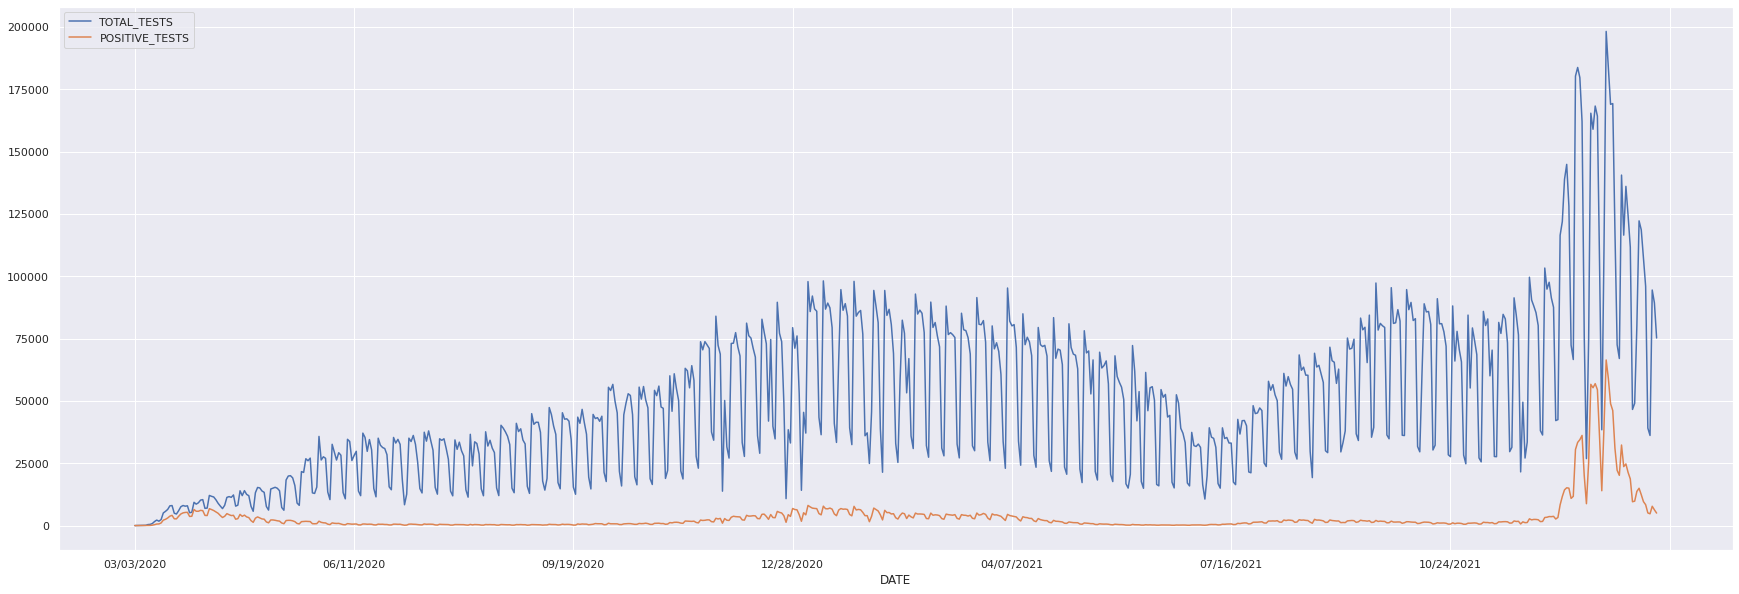

In [ ]:
ax = plt.gca() #get current ax

molecular_tests.plot(x = 'DATE', y = 'TOTAL_TESTS', figsize = (30,10), ax=ax)
molecular_tests.plot(x = 'DATE', y = 'POSITIVE_TESTS', figsize = (30,10),ax=ax)

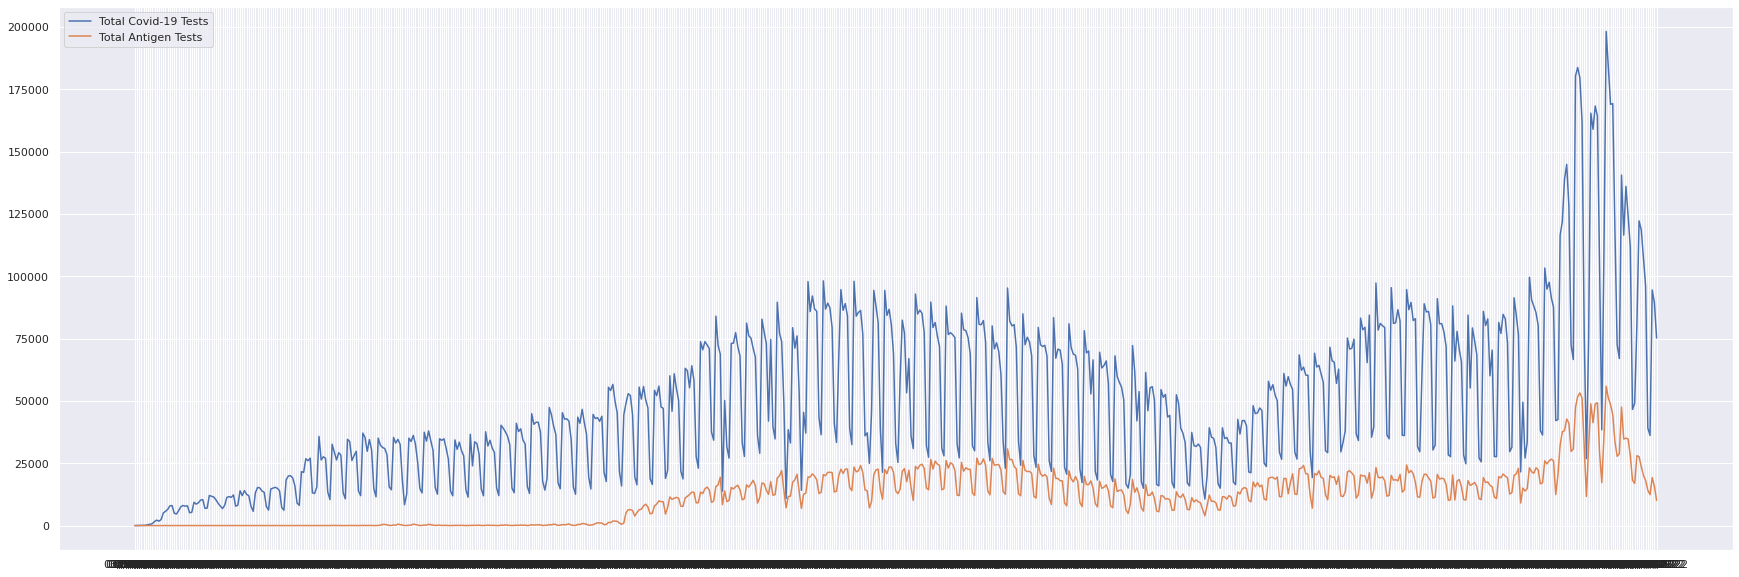

In [ ]:
plt.figure(figsize=(30, 10))
plt.plot(dates, antigen['TOTAL_TESTS'] , label = 'Total Covid-19 Tests')
plt.plot(dates, antigen['TOTAL_ANTIGEN_TESTS'], label = 'Total Antigen Tests')
plt.legend()
plt.show()

CONCLUSIONS:
* There was a rise in positive tests in March 2020 then dipped and stayed stagnant from June 2020 to November 2020. Total test numbers were still flunctuating, but higher than total positive tests.
* Overall, testing started descreasing in the first half of 2021 and positive tests was flatlining. Then in July of 2021, testing went back up, and positive tests increased a bit
* Towards the end of 2021, there was a huge jump in testing as well as positive results.
* When there was a dip in total tests there was, of course, a dip in positive tests as well.


# Covid Variant Trends

In [ ]:
df_variants = pd.read_csv("https://raw.githubusercontent.com/nychealth/coronavirus-data/master/variants/variant-epi-data.csv")
df_vc = pd.read_csv("https://raw.githubusercontent.com/nychealth/coronavirus-data/master/variants/variant-classification.csv")

In [ ]:
sns.set(rc={'figure.figsize':(40,10)})

In [ ]:
df_variants.head(10)

,Sequence week,B.1.526 +E484K count,B.1.526 +E484K percent,B.1.526 no E484K count,B.1.526 no E484K percent,B.1.1.7 count,B.1.1.7 percent,P.1 count,P.1 percent,B.1.427 count,B.1.427 percent,B.1.429 count,B.1.429 percent,B.1.351 count,B.1.351 percent,B.1.617.2 count,B.1.617.2 percent,B.1.621 count,B.1.621 percent,B.1.1.529 count,B.1.1.529 percent,Other count,Other percent,incomplete
0,01/02/2021,3,1,31,6,4,1,0,0,2,0,6,1,0,0,0,0,0,0,0,0,486,91,NaN
1,01/09/2021,8,1,50,6,8,1,0,0,5,1,12,1,0,0,0,0,0,0,0,0,789,90,NaN
2,01/16/2021,9,2,44,11,13,3,0,0,5,1,12,3,0,0,0,0,0,0,0,0,336,80,NaN
3,01/23/2021,13,3,55,11,8,2,0,0,1,0,6,1,0,0,0,0,0,0,0,0,400,83,NaN
4,01/30/2021,61,8,121,16,23,3,0,0,11,1,14,2,1,0,0,0,0,0,0,0,544,70,NaN
5,02/06/2021,82,8,205,20,78,8,0,0,8,1,17,2,0,0,0,0,0,0,0,0,617,61,NaN
6,02/13/2021,60,6,300,28,98,9,0,0,13,1,20,2,0,0,0,0,0,0,0,0,577,54,NaN
7,02/20/2021,164,14,249,21,111,10,0,0,16,1,17,1,2,0,1,0,0,0,0,0,605,52,NaN
8,02/27/2021,203,18,255,23,147,13,0,0,5,0,20,2,0,0,0,0,0,0,0,0,484,43,NaN
9,03/06/2021,194,19,312,31,156,15,0,0,9,1,16,2,1,0,1,0,0,0,0,0,331,32,NaN


In [ ]:
#We can see there is NaN value from the incomplete
df_vc

,variant,name,count,total,percent_in_NYC
0,B.1.1.529,Omicron,12398,12915,96
1,B.1.617.2,Delta,510,12915,4
2,B.1.1.7,Alpha,0,12915,0
3,B.1.351,Beta,0,12915,0
4,B.1.427,Epsilon,0,12915,0
5,B.1.429,Epsilon,0,12915,0
6,B.1.525,Eta,0,12915,0
7,B.1.526,Iota,0,12915,0
8,B.1.621,NaN,0,12915,0
9,P.1,Gamma,0,12915,0


In [ ]:
#Drop everything except percent
backup = df_variants.copy()
for i in (df_variants.columns):
  if "count" in i:
    df_variants.drop(i,axis=1, inplace =True)

df_variants.drop("incomplete",axis=1, inplace=True)
df_variants.drop("B.1.526 no E484K percent",axis=1, inplace=True)
df_variants.columns

Index(['Sequence week', 'B.1.526 +E484K  percent', 'B.1.1.7 percent',
       'P.1 percent', 'B.1.427 percent', 'B.1.429 percent', 'B.1.351 percent',
       'B.1.617.2 percent', 'B.1.621 percent', 'B.1.1.529 percent',
       'Other percent'],
      dtype='object')

In [ ]:
IndexName = ["Sequence week", "Iota", "Alpha", "Gamma", "Epsilon", "Epsilon_2", "Beta", "Delta", "B.1.621", "Omicron", "Other percent" ]

df_variants.columns = IndexName


df_variants= df_variants.set_index("Sequence week")
df_variants.head(10)

,Iota,Alpha,Gamma,Epsilon,Epsilon_2,Beta,Delta,B.1.621,Omicron,Other percent
Sequence week,,,,,,,,,,
01/02/2021,1,1,0,0,1,0,0,0,0,91
01/09/2021,1,1,0,1,1,0,0,0,0,90
01/16/2021,2,3,0,1,3,0,0,0,0,80
01/23/2021,3,2,0,0,1,0,0,0,0,83
01/30/2021,8,3,0,1,2,0,0,0,0,70
02/06/2021,8,8,0,1,2,0,0,0,0,61
02/13/2021,6,9,0,1,2,0,0,0,0,54
02/20/2021,14,10,0,1,1,0,0,0,0,52
02/27/2021,18,13,0,0,2,0,0,0,0,43


In [ ]:
backup= backup.set_index("Sequence week")
for i in (backup.columns):
  if not "count" in i:
    backup.drop(i,axis=1, inplace =True)
backup.drop("B.1.526 no E484K count",axis=1, inplace =True)
print(backup.head(5))

               B.1.526 +E484K count  ...  Other count
Sequence week                        ...             
01/02/2021                        3  ...          486
01/09/2021                        8  ...          789
01/16/2021                        9  ...          336
01/23/2021                       13  ...          400
01/30/2021                       61  ...          544

[5 rows x 10 columns]


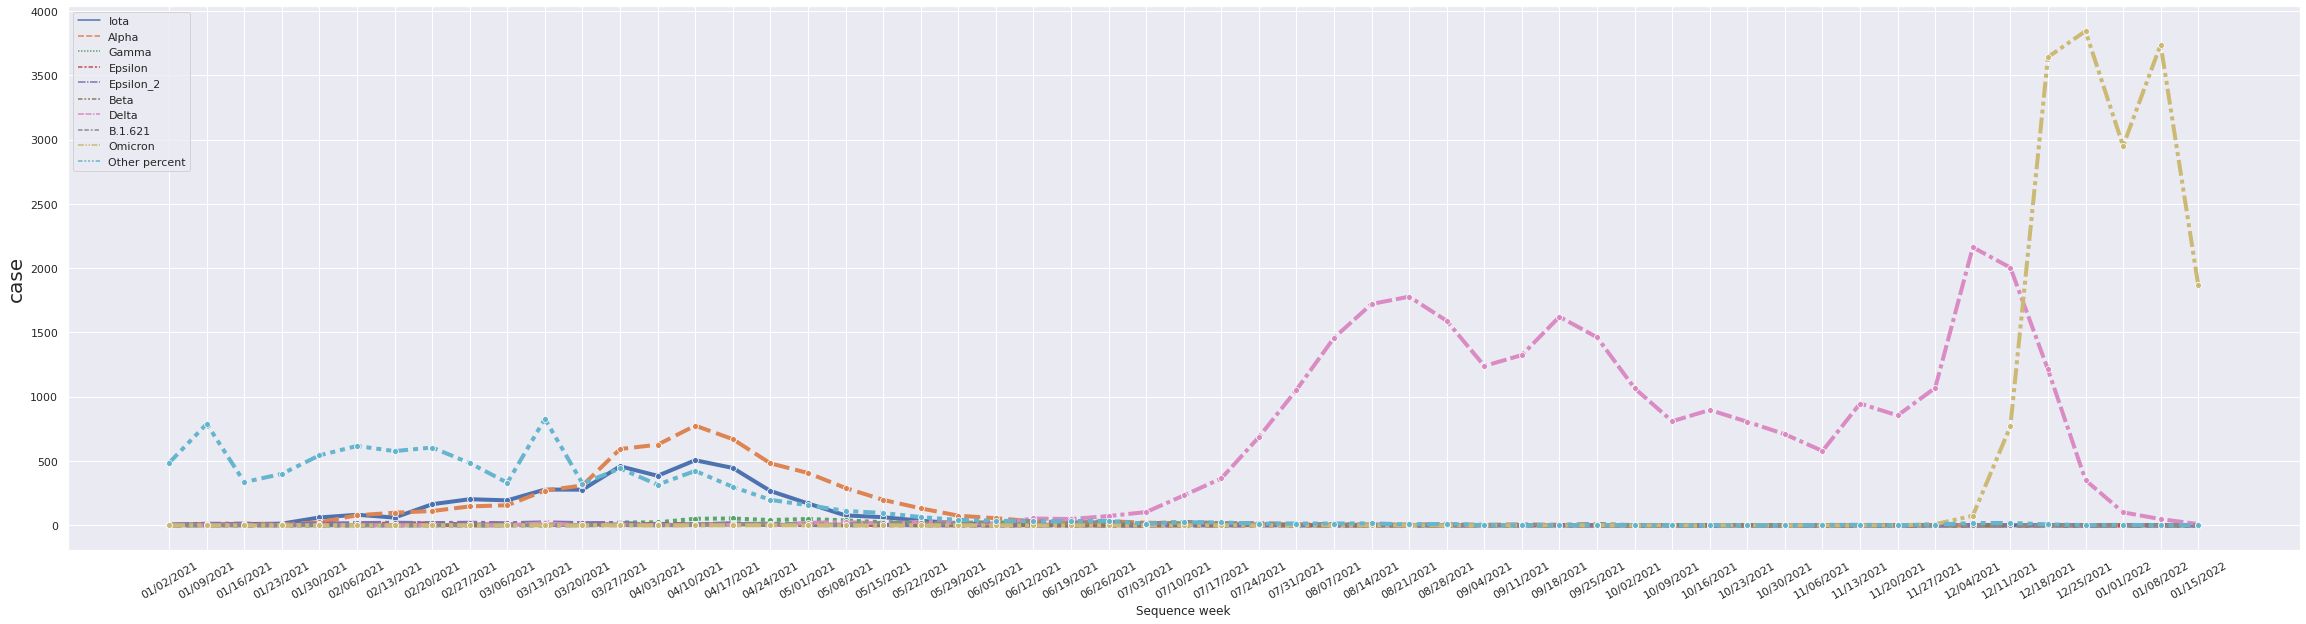

In [ ]:
backup.columns = IndexName[1:]


daily = sns.lineplot(data= backup, linewidth = 4, marker="o")
daily.set_ylabel("case", fontsize = 20)
plt.xticks(rotation=30)
plt.show()

In [ ]:
total = 0
for i in (backup):
  if "count" in i:
    print(f"{i}: {backup[i].sum()} ")
    total += backup[i].sum()
print(f"total: {total}")

total: 0


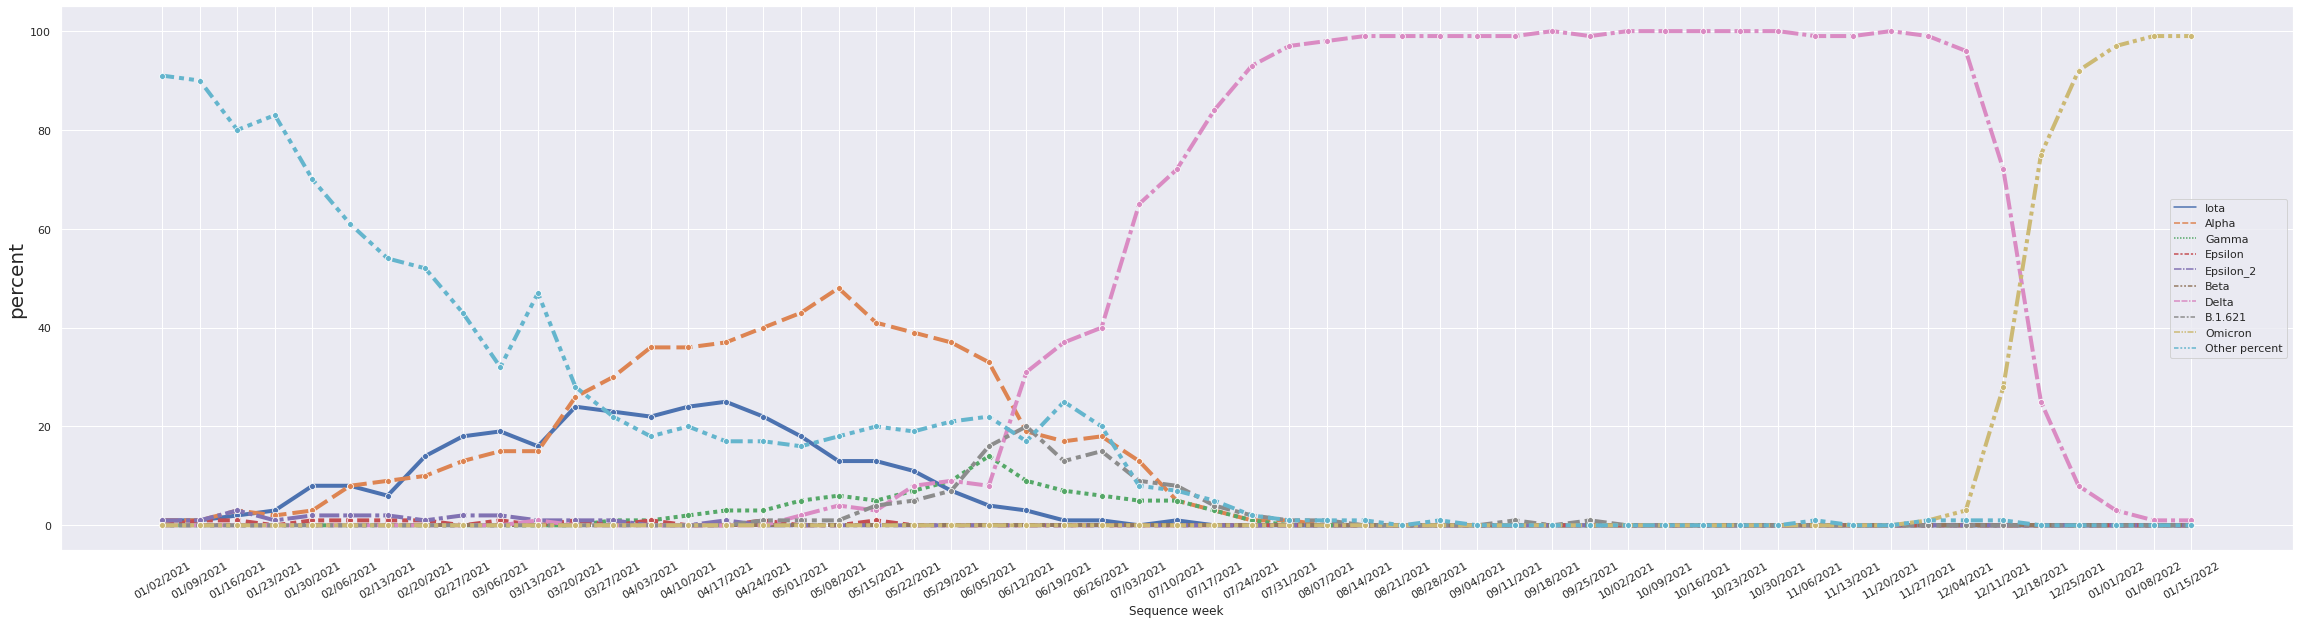

In [ ]:
x = sns.lineplot(data= df_variants, linewidth = 4, marker="o")
plt.xticks(rotation=30)
x.set_ylabel("percent", fontsize = 20)
plt.show()

# Stock Market Analysis

In [ ]:
import yfinance as yf
# For time stamps
from datetime import datetime
# For division
from __future__ import division


In [ ]:
Segment_Stock_market = ['QQQ','SPY','DOW']

end = datetime.now()
start = datetime(end.year - 2,end.month,end.day)

for Segment in Segment_Stock_market:
  #Here we get the data from each index
  globals()[Segment] = yf.download(Segment,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
QQQ.describe()

,Open,High,Low,Close,Adj Close,Volume
count,505.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02
mean,307.078337,309.554257,304.275664,307.135070,305.782991,4.756617e+07
std,60.200530,59.896713,60.236112,60.099078,60.610575,2.541601e+07
min,170.919998,174.210007,164.929993,169.300003,167.534470,1.678500e+07
25%,264.510010,267.429993,260.109985,264.160004,262.417847,3.055910e+07
50%,315.209991,316.989990,311.570007,314.320007,312.842865,3.939500e+07
75%,359.880005,362.410004,357.570007,360.000000,359.410950,5.541490e+07
max,405.570007,408.709991,402.579987,403.989990,403.480011,1.994481e+08


In [ ]:
QQQ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2020-01-29 to 2022-01-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       505 non-null    float64
 1   High       505 non-null    float64
 2   Low        505 non-null    float64
 3   Close      505 non-null    float64
 4   Adj Close  505 non-null    float64
 5   Volume     505 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.6 KB


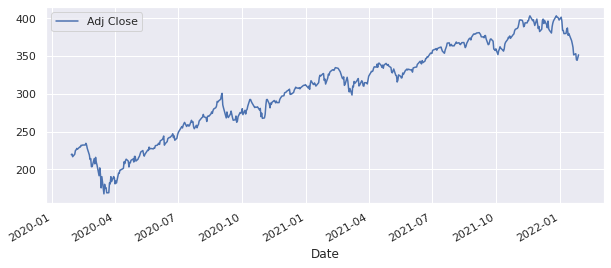

In [ ]:
QQQ['Adj Close'].plot(legend=True,figsize=(10,4))

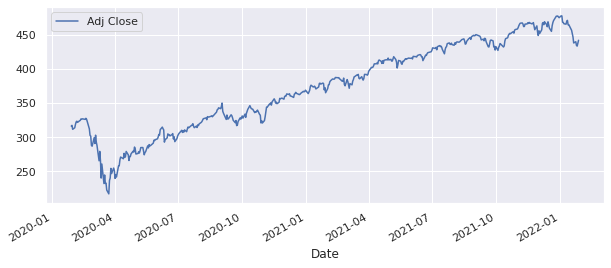

In [ ]:
SPY['Adj Close'].plot(legend=True,figsize=(10,4))

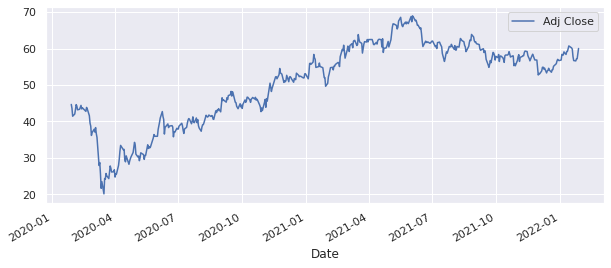

In [ ]:
DOW['Adj Close'].plot(legend=True,figsize=(10,4))

In [ ]:
QQQ.head(150)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-29,222.679993,222.929993,220.830002,221.809998,219.496872,28924500
2020-01-30,220.380005,222.699997,219.690002,222.600006,220.278625,39568100
2020-01-31,223.529999,223.559998,218.289993,219.070007,216.785431,52015800
2020-02-03,220.139999,222.889999,219.990005,222.380005,220.060913,25408600
2020-02-04,225.419998,227.860001,224.649994,227.470001,225.097839,30691200
...,...,...,...,...,...,...
2020-08-25,282.829987,286.059998,282.369995,285.859985,283.974701,34866600
2020-08-26,287.149994,292.220001,285.829987,291.959991,290.034454,42216700
2020-08-27,292.970001,293.850006,288.709991,291.049988,289.130463,49482700


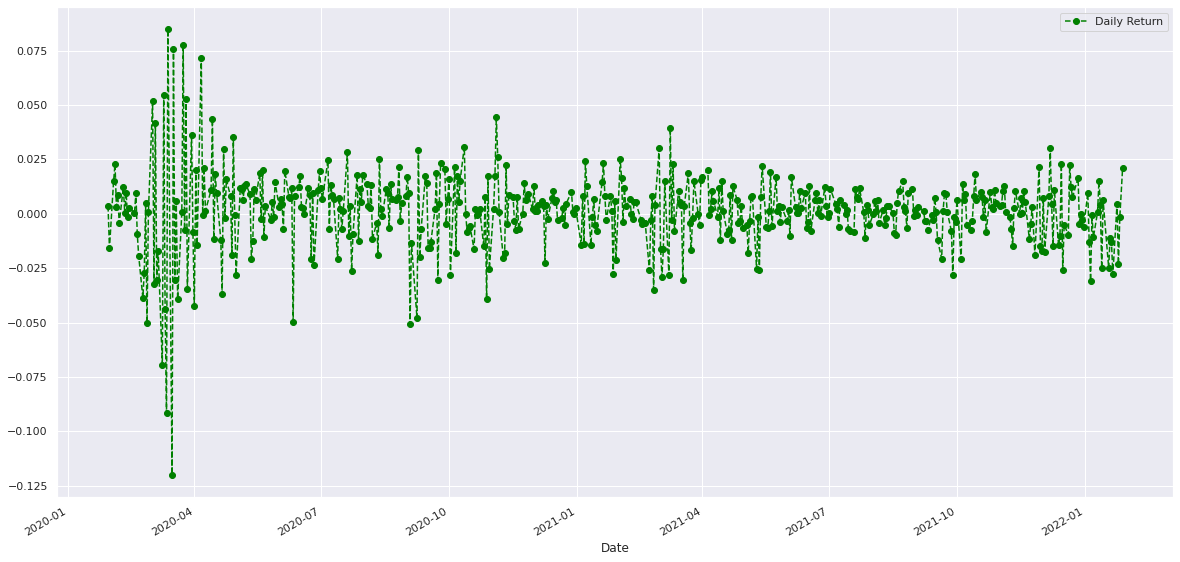

In [ ]:
QQQ['Daily Return'] = QQQ ['Adj Close'].pct_change()
QQQ['Daily Return'].plot(figsize=(20,10),legend=True,linestyle='--',marker='o',color='green')

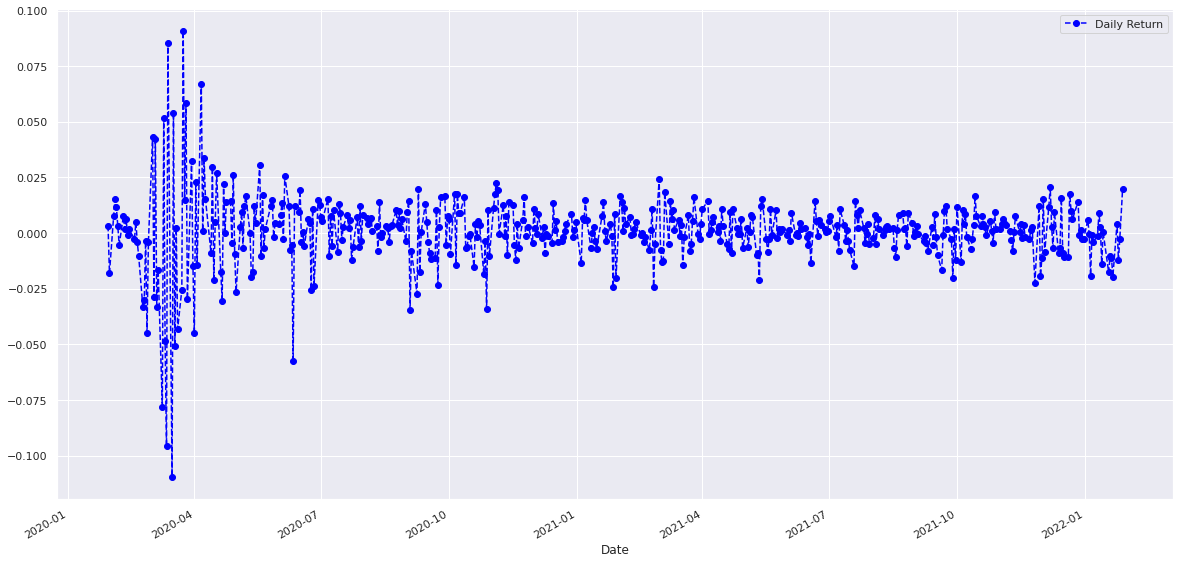

In [ ]:
SPY['Daily Return'] = SPY ['Adj Close'].pct_change()
SPY['Daily Return'].plot(figsize=(20,10),legend=True,linestyle='--',marker='o',color='blue')

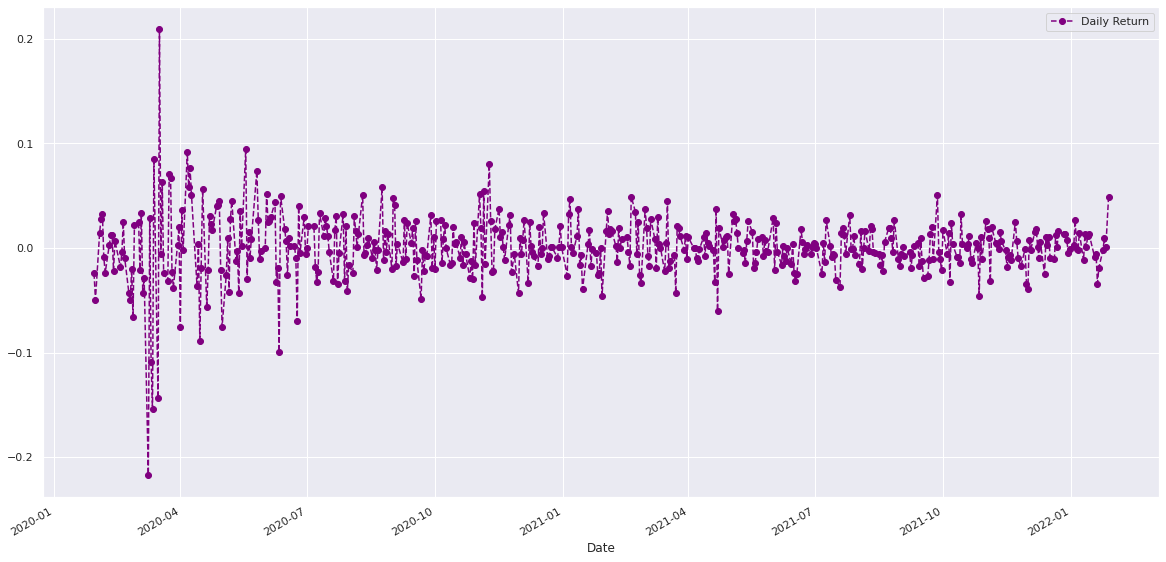

In [ ]:
DOW['Daily Return'] = DOW ['Adj Close'].pct_change()
DOW['Daily Return'].plot(figsize=(20,10),legend=True,linestyle='--',marker='o',color='purple')

Overall,the QQQ,SPY and DOW had similar daily returns. The main difference is that DOW and SPY had much bigger negative daily returns at the start of the pandemic compared to the QQQ

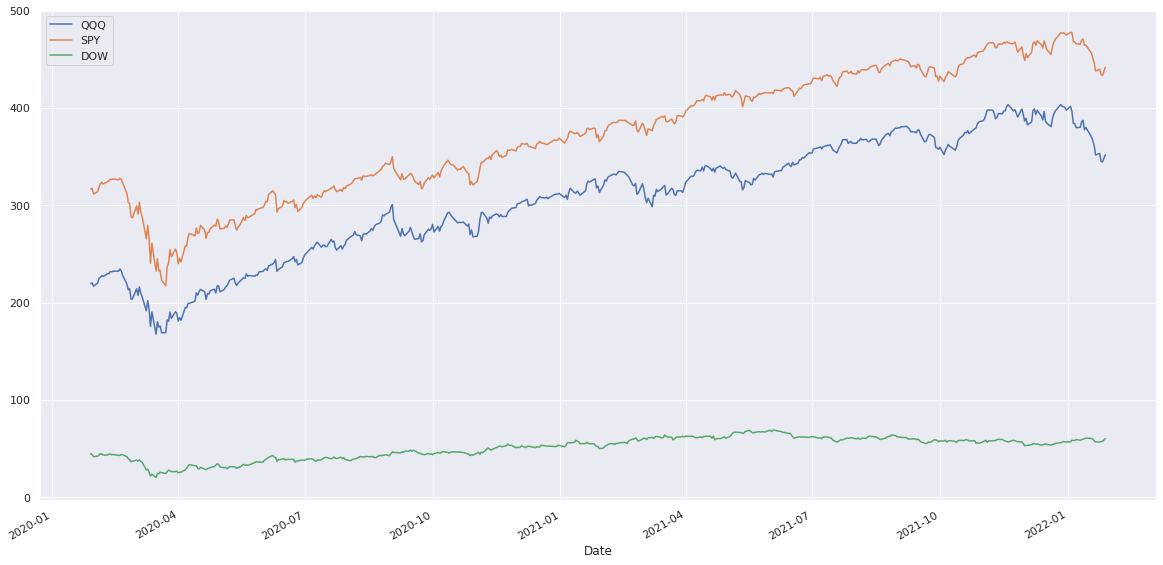

In [ ]:
lol1 = ['QQQ','SPY','DOW']
lol = [QQQ,SPY,DOW]
for i in lol:
  i['Adj Close'].plot(figsize=(20,10),kind='line')
plt.legend(lol1)

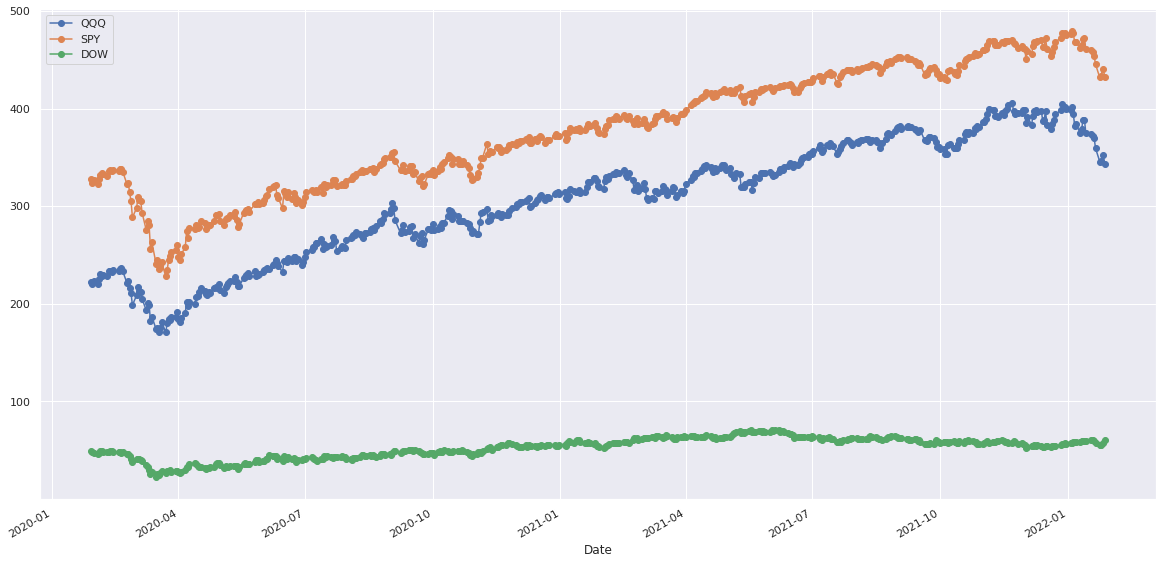

In [ ]:
lol1 = ['QQQ','SPY','DOW']
lol = [QQQ,SPY,DOW]
for i in lol:
  i['Open'].plot(figsize=(20,10),marker='o')
plt.legend(lol1)

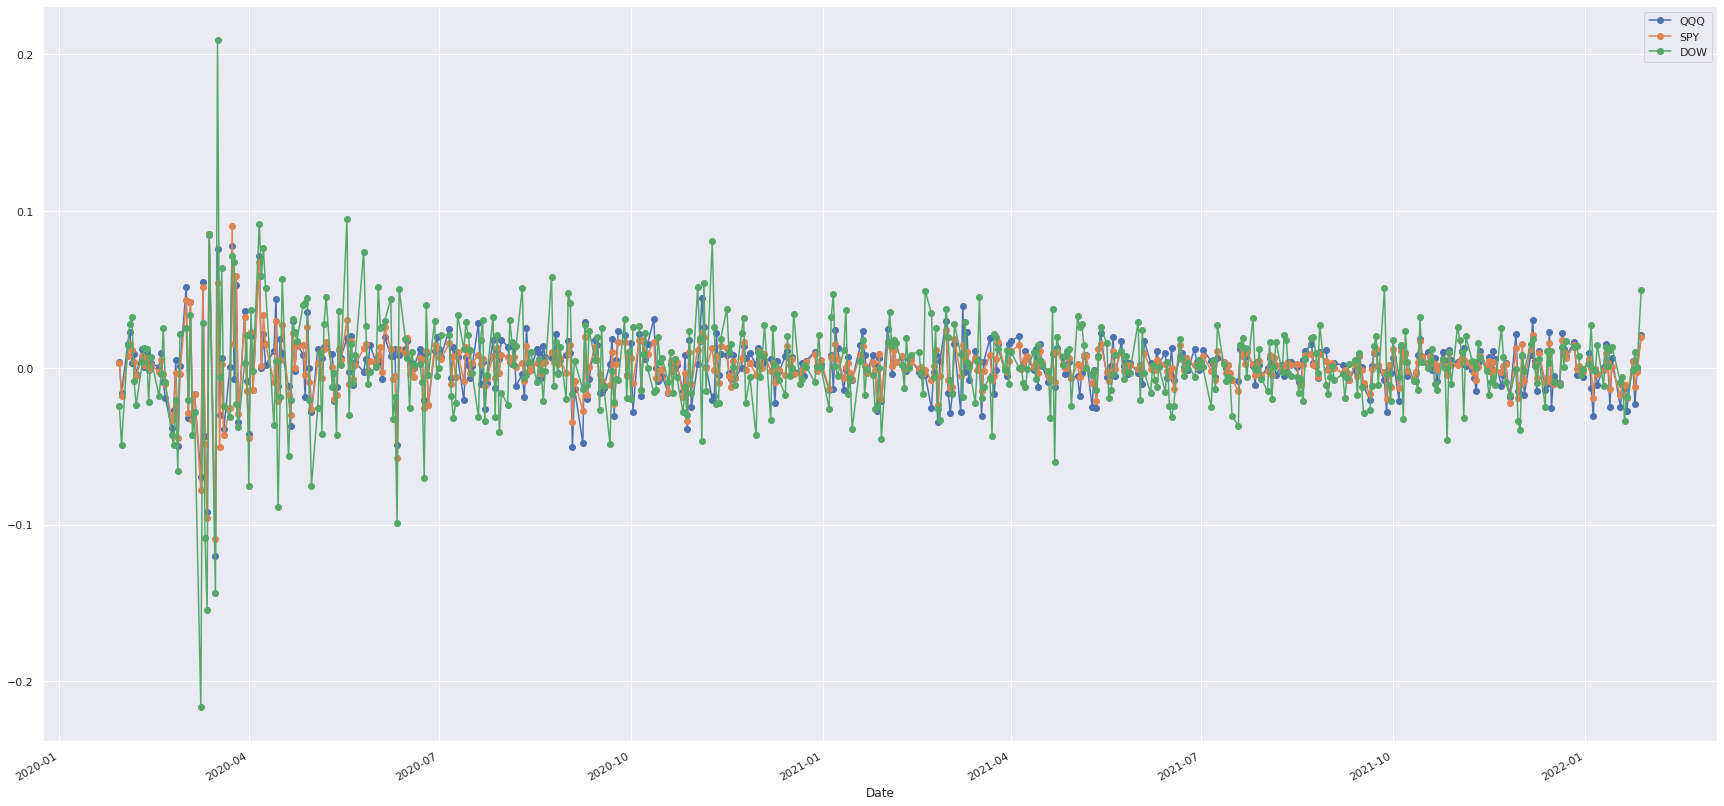

In [ ]:
lol1 = ['QQQ','SPY','DOW']
lol = [QQQ,SPY,DOW]
for i in lol:
  i['Daily Return'].plot(figsize=(30,15),marker='o')
plt.legend(lol1)

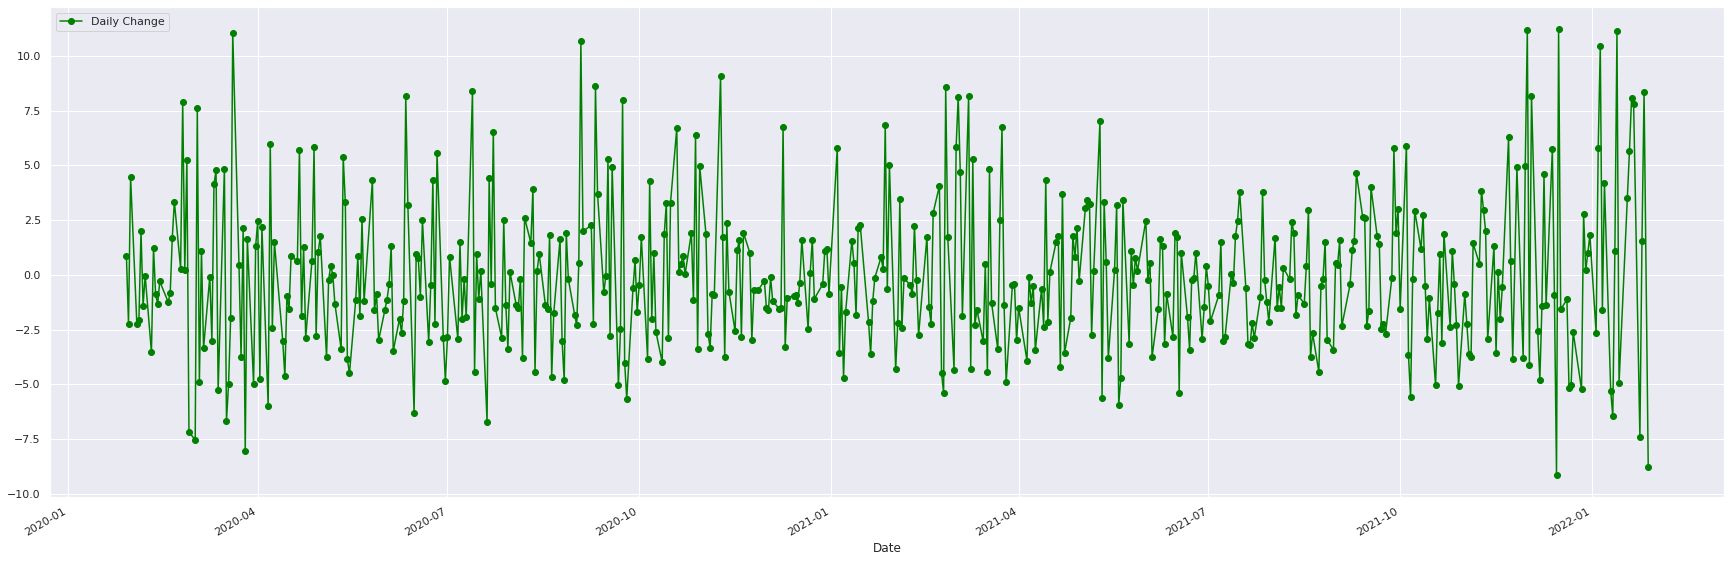

In [ ]:
for x in lol:
  x['Daily Change'] = (x ['Open'] - x['Close'])

QQQ['Daily Change'].plot(figsize=(30,10),legend=True,linestyle='solid',marker='o',color='green')

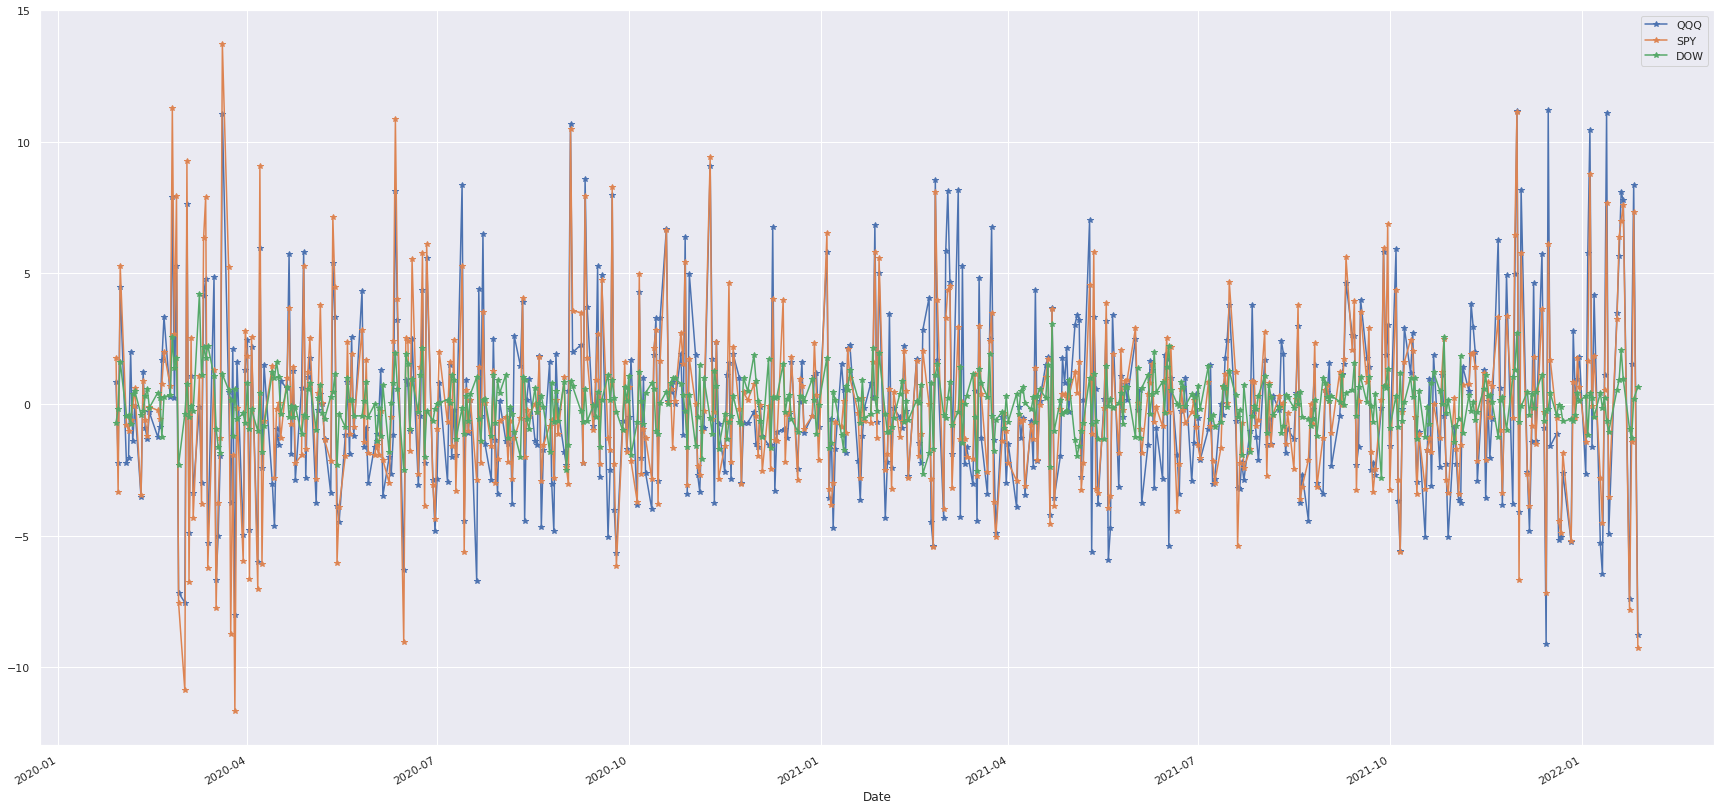

In [ ]:
lol1 = ['QQQ','SPY','DOW']
lol = [QQQ,SPY,DOW]
for i in lol:
  i['Daily Change'].plot(figsize=(30,15),marker='*')
plt.legend(lol1)

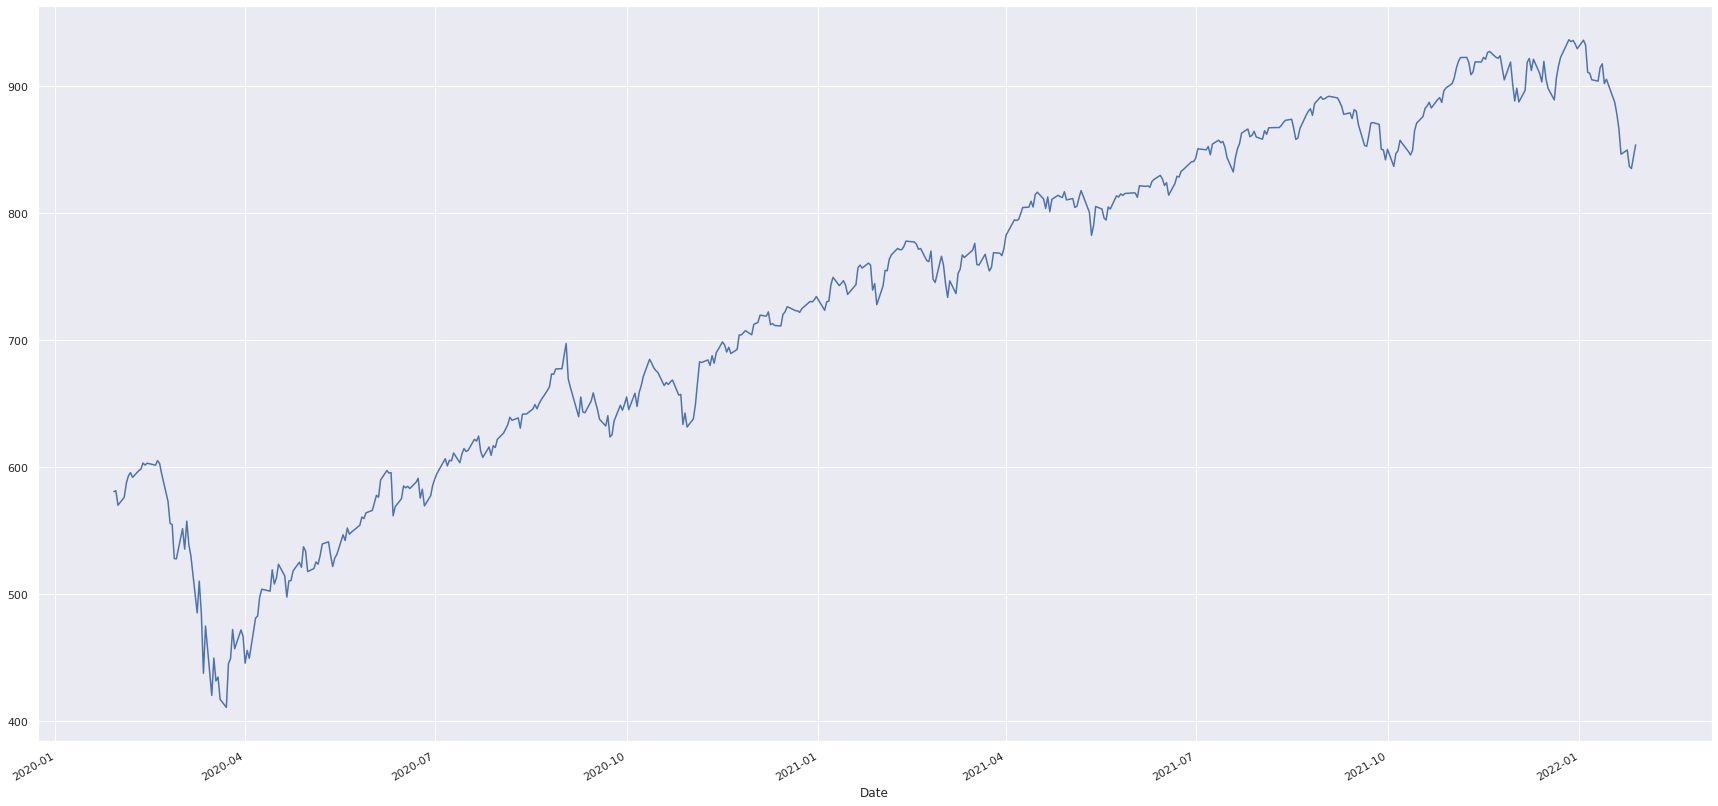

In [ ]:
Whole_market = 0
for i in lol:
  Whole_market += i['Adj Close']
Whole_market.plot(figsize=(30,15))

:)